<a href="https://colab.research.google.com/github/owenfink9/covid19/blob/master/covid_19_kaggle_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load Data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
np.set_printoptions(suppress=True)

In [136]:
from google.colab import files
uploaded = files.upload()

Saving covid_kaggle.xlsx to covid_kaggle (1).xlsx


In [137]:
covid = pd.read_excel("covid_kaggle.xlsx")

In [138]:
covid.shape

(5644, 111)

# 1. Data Wash

Remove test results for other viruses, we'd like to predict the SARS-Cov-2 test result.

In [139]:
covid = covid.drop(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Parainfluenza 1', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Influenza B, rapid test', 'Influenza A, rapid test'], axis=1)

Remove irrelvalent Features including patients ID and patients intention to the ward level.

In [140]:
covid = covid.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1)

Less than 100 patients among 5644 took urine tests.

In [141]:
urine_features = ['Urine - Esterase', 'Urine - Aspect', 'Urine - pH', 'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Sugar', 'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Red blood cells', 'Urine - Hyaline cylinders', 'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color']

In [142]:
covid = covid.drop(urine_features, axis=1)

Less than 100 patients among 5644 took aerial blood gas tests.

In [143]:
arterial_blood_gas_features = ['Hb saturation (arterial blood gases)', 'pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)', 'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']

In [144]:
covid = covid.drop(arterial_blood_gas_features, axis=1)

Reamove features containing less than 100 patients' records

In [145]:
i = 0
for column in covid:
    if (covid[column].count() < 100):
        print(column, covid[column].count())
        covid = covid.drop(column, axis=1)

Mycoplasma pneumoniae 0
Ionized calcium  50
Magnesium 40
Fio2 (venous blood gas analysis) 1
Rods # 97
Segmented 97
Promyelocytes 97
Metamyelocytes 97
Myelocytes 97
Myeloblasts 97
Partial thromboplastin time (PTT)  0
Relationship (Patient/Normal) 91
Prothrombin time (PT), Activity 0
Vitamin B12 3
Ferritin 23
Arterial Lactic Acid 27
Lipase dosage 8
D-Dimer 0
Albumin 13


Drop constant features

In [146]:
covid = covid.loc[:,covid.apply(pd.Series.nunique) != 1]

Drop features has least patients' records

In [147]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]

In [148]:
# [ [covid.columns.get_loc(c), c] for c in sorted_features if c in covid]

Now all features contain at least 100 patients' record

In [149]:
covid_init = covid[sorted_features[-1]]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 5644
Patient age quantile 5644
Hemoglobin 603
Hematocrit 603
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 506
Creatinine 424
Urea 397
Potassium 371
Sodium 370
Strepto A 332
Aspartate transaminase 226
Alanine transaminase 225
Serum Glucose 208
Total Bilirubin 182
Indirect Bilirubin 182
Direct Bilirubin 182
Gamma-glutamyltransferase  153
Alkaline phosphatase 144
pO2 (venous blood gas analysis) 136
pH (venous blood gas analysis) 136
pCO2 (venous blood gas analysis) 136
Total CO2 (venous blood gas analysis) 136
Hb saturation (venous blood gas analysis) 136
HCO3 (venous blood gas analysis) 136
Base excess (venous blood gas analysis) 136
International normalized ratio (INR) 

In [150]:
removed_features = ['Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'International normalized ratio (INR)', 'Base excess (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)', 'pCO2 (venous blood gas analysis)', 'pH (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0', 'Direct Bilirubin', 'Indirect Bilirubin', 'Total Bilirubin', 'Serum Glucose', 'Alanine transaminase', 'Aspartate transaminase', 'Strepto A', 'Sodium', 'Potassium', 'Urea', 'Creatinine']

In [151]:
covid = covid.drop(removed_features, axis=1)

In [152]:
covid.shape

(5644, 18)

Drop patients that have less than 10 records

In [153]:
for index, row in covid.iterrows():
    if row.count() < 10:
        covid.drop(index, inplace=True)

Now we have more than 500 records

In [154]:
features = list(covid.columns)
sorted_features = [x for _,x in sorted(zip(covid[features].count(), features))]
for i in reversed(range(0, len(sorted_features))):
    print(sorted_features[i], covid[sorted_features[i]].count())

SARS-Cov-2 exam result 602
Red blood cell distribution width (RDW) 602
Red blood Cells 602
Platelets 602
Patient age quantile 602
Mean corpuscular volume (MCV) 602
Mean corpuscular hemoglobin concentration (MCHC) 602
Mean corpuscular hemoglobin (MCH) 602
Lymphocytes 602
Leukocytes 602
Hemoglobin 602
Hematocrit 602
Eosinophils 602
Basophils 602
Monocytes 601
Mean platelet volume  599
Neutrophils 513
Proteina C reativa mg/dL 502


Drop NaN

In [155]:
covid = covid.dropna()

Map classification string to 0-1

In [156]:
covid['SARS-Cov-2 exam result'] = covid['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
covid.shape

(420, 18)

# 2. Train test split

In [158]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [159]:
y = covid["SARS-Cov-2 exam result"].to_numpy()

In [160]:
X = covid
X = X.drop(["SARS-Cov-2 exam result"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [161]:
X_train.shape

(336, 17)

In [162]:
X_test.shape

(84, 17)

In [163]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [164]:
print(np.sum(y_train), "positive among", len(y_train), 'patients')

50 positive among 336 patients


In [165]:
print(np.sum(y_test), "positive among", len(y_test), 'patients')

9 positive among 84 patients


# SMOTE

In [166]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_smote_train, y_smote_train = os.fit_resample(X_train, y_train)

In [167]:
print(np.sum(y_smote_train), "positive among", len(y_smote_train), 'patients')

286 positive among 572 patients


# 3. Feature Selection

### 3.1 Basic Methods

#### 3.1.1 Drop constant and Quasi-constant features

In [168]:
from sklearn.feature_selection import VarianceThreshold

In [169]:
def drop_features(X_train, X_test, threshhold):
    sel = VarianceThreshold(threshold=threshhold)
    sel.fit(X_train)
    print("No. of constant features:",
        len([
            x for x in X_train.columns
            if x not in X_train.columns[sel.get_support()]
        ])
    )
    constant_features = [x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

    print(constant_features)
    X_train.drop(labels=constant_features, axis=1, inplace=True)
    X_test.drop(labels=constant_features, axis=1, inplace=True)

In [170]:
drop_features(X_train, X_test, 0.01)
drop_features(X_smote_train, X_test, 0.01)

No. of constant features: 0
[]
No. of constant features: 0
[]


#### 3.1.2 Drop Duplicated Features

In [171]:
covid_t = covid.T
print("No. of Duplicated Features:", covid_t.duplicated().sum())
print(covid_t[covid_t.duplicated()].index.values)

No. of Duplicated Features: 0
[]


### 3.2 Correlations

In [172]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,Hematocrit,Hemoglobin,0.967940
1,Hemoglobin,Hematocrit,0.967940
2,Neutrophils,Lymphocytes,0.931494
3,Lymphocytes,Neutrophils,0.931494
4,Red blood Cells,Hematocrit,0.913360
5,Hematocrit,Red blood Cells,0.913360
6,Red blood Cells,Hemoglobin,0.888691
7,Hemoglobin,Red blood Cells,0.888691
8,Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),0.860652
9,Mean corpuscular hemoglobin (MCH),Mean corpuscular volume (MCV),0.860652


In [173]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 17 total features


In [174]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

     feature1         feature2     corr
0  Hematocrit       Hemoglobin  0.96794
5  Hematocrit  Red blood Cells  0.91336

      feature1     feature2      corr
2  Neutrophils  Lymphocytes  0.931494

                        feature1                           feature2      corr
8  Mean corpuscular volume (MCV)  Mean corpuscular hemoglobin (MCH)  0.860652



In [175]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [176]:
corr_features = list((correlation(X_train, 0.8)))
print(corr_features)

['Red blood Cells', 'Mean corpuscular volume (MCV)', 'Hemoglobin']


In [177]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_smote_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [178]:
X_train.shape, X_smote_train.shape, X_test.shape

((336, 14), (572, 14), (84, 14))

### 3.3 Statistical Methods

#### 3.3.1 Mutual Information

In [179]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [180]:
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

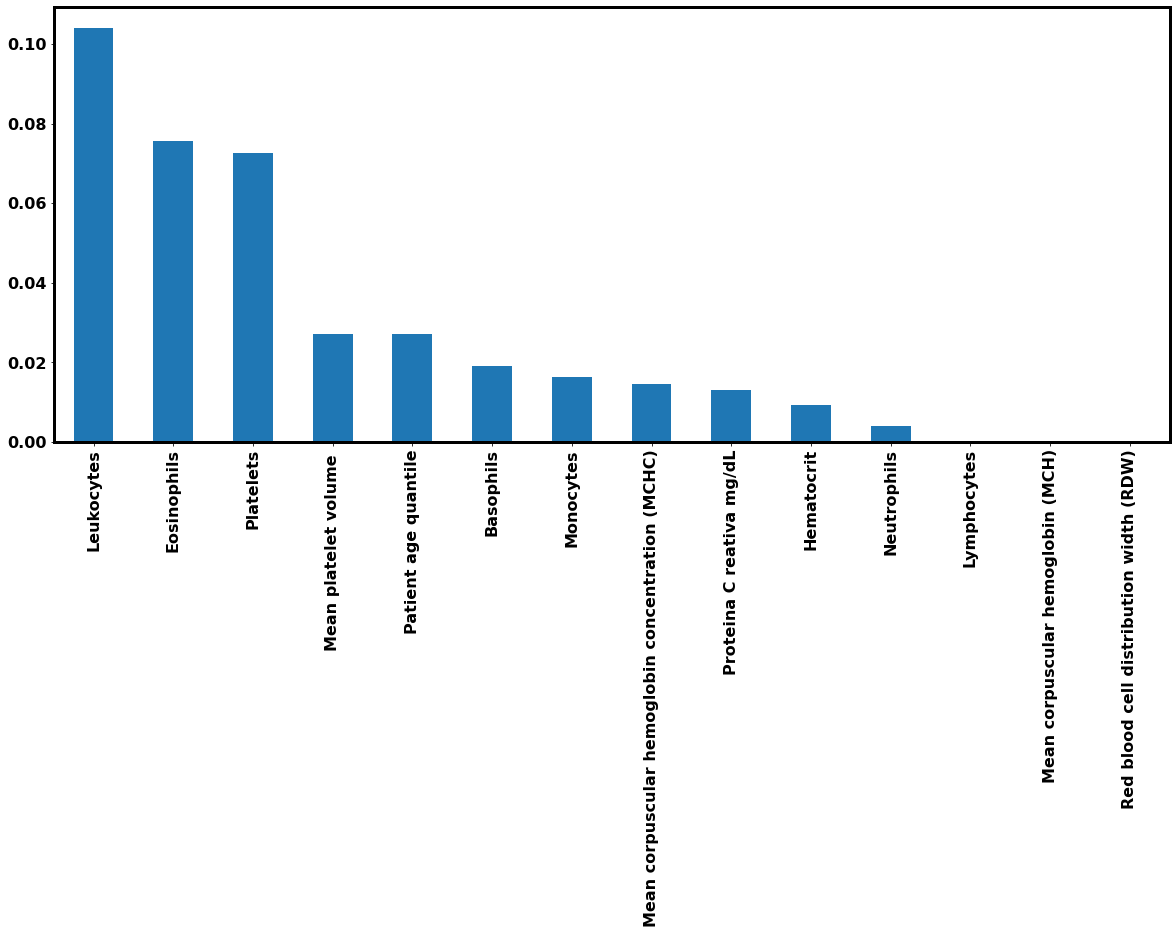

In [181]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [182]:
sel_ = SelectKBest(mutual_info_classif, k = 10).fit(X_train, y_train)
sel_smote_ = SelectKBest(mutual_info_classif, k = 10).fit(X_smote_train, y_smote_train)

In [183]:
mi_features = list(X_train.columns[ ~ sel_.get_support()].values)
mi_features_smote = list(X_smote_train.columns[ ~ sel_.get_support()].values)

In [184]:
mi_features

['Patient age quantile',
 'Lymphocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Red blood cell distribution width (RDW)']

In [185]:
mi_features_smote

['Patient age quantile',
 'Lymphocytes',
 'Mean corpuscular hemoglobin (MCH)',
 'Red blood cell distribution width (RDW)']

In [186]:
X_train.drop(labels=mi_features, axis=1, inplace=True)
X_smote_train.drop(labels=mi_features_smote, axis=1, inplace=True)
X_test.drop(labels=mi_features, axis=1, inplace=True)

In [187]:
X_train.shape

(336, 10)

In [188]:
X_smote_train.shape

(572, 10)

In [189]:
X_test.shape

(84, 10)

In [190]:
list(X_train.columns)

['Hematocrit',
 'Platelets',
 'Mean platelet volume ',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Eosinophils',
 'Monocytes',
 'Neutrophils',
 'Proteina C reativa mg/dL']

# 3. Classifier

In [191]:
import sklearn
import sklearn.ensemble
import sklearn.metrics
import xgboost as xgb

In [192]:
from sklearn.model_selection import cross_val_score

In [193]:
def cv_score(classifier, X, y, scoring):
    return cross_val_score(classifier, X, y, cv=5, scoring=scoring)

## 3.1.1 Decision Tree - Original

In [194]:
dt = sklearn.tree.DecisionTreeClassifier()

dt_f1 = cv_score(dt, X_train, y_train, 'f1')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [195]:
print(np.mean(dt_f1))

0.3109255715045188


## 3.1.2 Decision Tree - SMOTE

In [196]:
dt_smote = sklearn.tree.DecisionTreeClassifier()

dt_smote_f1 = cv_score(dt_smote, X_smote_train, y_smote_train, 'f1')

dt_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier()

In [197]:
print(np.mean(dt_smote_f1))

0.888232725241523


## 3.2.1 Random Forests - Original

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_f1 = cv_score(rf, X_train, y_train, 'f1')

rf.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
print(np.mean(rf_f1))

0.3580112044817928


## 3.2.2 Random Forests - SMOTE

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rf_smote = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

rf_smote_f1 = cv_score(rf_smote, X_smote_train, y_smote_train, 'f1')

rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier()

In [203]:
print(np.mean(rf_smote_f1))

0.9340139372464915


# 3.3.1 XGBoost - Original

In [204]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_f1 = cv_score(xgbc, np.array(X_train), np.array(y_train), 'f1')

# Fit the models
xgbc.fit(np.array(X_train), np.array(y_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [205]:
print(np.mean(xgbc_f1))

0.5484949832775919


# 3.3.2 XGBoost - SMOTE

In [206]:
# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
xgbc_smote = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    objective = 'binary:logistic',
    use_label_encoder=False,
    eval_metric='error'
)

xgbc_smote_f1 = cv_score(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), 'f1')

# Fit the models
xgbc_smote.fit(np.array(X_smote_train), np.array(y_smote_train))

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, eval_metric='error',
              max_depth=4, min_child_weight=0, reg_alpha=4, scale_pos_weight=9,
              subsample=0.8, use_label_encoder=False)

In [207]:
print(np.mean(xgbc_smote_f1))

0.9034626344086021


# 3.4.1 Logistic Regression - Original

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr_f1 = cv_score(lr, X_train, y_train, 'f1')

lr.fit(X_train, y_train)

LogisticRegression()

In [209]:
print(np.mean(lr_f1))

0.48732492997198884


# 3.4.2 Logistic Regression - SMOTE

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_smote = LogisticRegression()

lr_smote_f1 = cv_score(lr_smote, X_smote_train, y_smote_train, 'f1')

lr_smote.fit(X_smote_train, y_smote_train)

LogisticRegression()

In [211]:
print(np.mean(lr_smote_f1))

0.902083887995753


# 4. Prediction

## 4.1. Training Dataset

In [213]:
print("Decision Tree - Original")
print("Precision: ", np.mean(cross_val_score(dt, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(dt, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(dt, X, y, cv=10, scoring="f1")))

print()

print("Decision Tree - SMOTE")
print("Precision: ", np.mean(cross_val_score(dt_smote, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(dt_smote, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(dt_smote, X, y, cv=10, scoring="f1")))

print()

print("Random Forest - Original")
print("Precision: ", np.mean(cross_val_score(rf, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(rf, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(rf, X, y, cv=10, scoring="f1")))

print()

print("Random Forest - SMOTE")
print("Precision: ", np.mean(cross_val_score(rf_smote, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(rf_smote, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(rf_smote, X, y, cv=10, scoring="f1")))

print()

print("XGBoost - Original")
print("Precision: ", np.mean(cross_val_score(xgbc, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(xgbc, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(xgbc, X, y, cv=10, scoring="f1")))

print()

print("XGBoost - SMOTE")
print("Precision: ", np.mean(cross_val_score(xgbc_smote, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(xgbc_smote, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(xgbc_smote, X, y, cv=10, scoring="f1")))

print()

print("LR - Original")
print("Precision: ", np.mean(cross_val_score(lr, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(lr, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(lr, X, y, cv=10, scoring="f1")))

print()

print("LR - SMOTE")
print("Precision: ", np.mean(cross_val_score(lr_smote, X, y, cv=10, scoring="precision")))
print("Recall: ", np.mean(cross_val_score(lr_smote, X, y, cv=10, scoring="recall")))
print("F1: ", np.mean(cross_val_score(lr_smote, X, y, cv=10, scoring="f1")))


Decision Tree - Original
Precision:  0.5022222222222222
Recall:  0.42000000000000004
F1:  0.49972138972138963

Decision Tree - SMOTE
Precision:  0.46694444444444444
Recall:  0.47333333333333333
F1:  0.4545454545454545

Random Forest - Original
Precision:  0.6083333333333333
Recall:  0.35
F1:  0.44080808080808076

Random Forest - SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.6166666666666666
Recall:  0.33333333333333337
F1:  0.44523809523809527

XGBoost - Original
Precision:  0.5144660894660895
Recall:  0.6233333333333333
F1:  0.5467731614790439

XGBoost - SMOTE
Precision:  0.5144660894660895
Recall:  0.6233333333333333
F1:  0.5467731614790439

LR - Original


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.674047619047619
Recall:  0.45
F1:  0.5167016317016316

LR - SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.674047619047619
Recall:  0.45
F1:  0.5167016317016316


## 4.2. Test Dataset

In [215]:
dt_pred = dt.predict(X_test)
dt_smote_pred = dt_smote.predict(X_test)
rf_pred = rf.predict(X_test)
rf_smote_pred = rf_smote.predict(X_test)
xgbc_pred = xgbc.predict(np.array(X_test))
xgbc_smote_pred = xgbc_smote.predict(np.array(X_test))
lr_pred = lr.predict(X_test)
lr_smote_pred = lr_smote.predict(X_test)

print("Decision Tree - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, dt_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_pred))) / len(X_test)))

print()

print("Random Forest - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, rf_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_pred))) / len(X_test)))

print()

print("XGBoost - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, xgbc_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_pred))) / len(X_test)))

print()

print("LR - Original")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, lr_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_pred))) / len(X_test)))

print()

print("Decision Tree - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, dt_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, dt_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, dt_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, dt_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, dt_smote_pred))) / len(X_test)))

print()

print("Random Forest - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, rf_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, rf_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, rf_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, rf_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, rf_smote_pred))) / len(X_test)))

print()

print("XGBoost - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, xgbc_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, xgbc_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, xgbc_smote_pred))) / len(X_test)))

print()

print("LR - SMOTE")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, lr_smote_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, lr_smote_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, lr_smote_pred))
print("CI:", 1.96 * math.sqrt( ((1 - sklearn.metrics.accuracy_score(y_test, lr_smote_pred)) * (sklearn.metrics.accuracy_score(y_test, lr_smote_pred))) / len(X_test)))


Decision Tree - Original
Precision:  0.8690476190476191
Recall:  0.6666666666666666
F1:  0.5217391304347826
CI: 0.07214311907333663

Random Forest - Original
Precision:  0.9047619047619048
Recall:  0.3333333333333333
F1:  0.42857142857142855
CI: 0.06277531951922459

XGBoost - Original
Precision:  0.8928571428571429
Recall:  0.7777777777777778
F1:  0.6086956521739131
CI: 0.06614378277661474

LR - Original
Precision:  0.9047619047619048
Recall:  0.4444444444444444
F1:  0.5
CI: 0.06277531951922459

Decision Tree - SMOTE
Precision:  0.8095238095238095
Recall:  0.3333333333333333
F1:  0.27272727272727276
CI: 0.08397530501196081

Random Forest - SMOTE
Precision:  0.9166666666666666
Recall:  0.6666666666666666
F1:  0.631578947368421
CI: 0.059105993930552596

XGBoost - SMOTE
Precision:  0.8095238095238095
Recall:  0.7777777777777778
F1:  0.4666666666666666
CI: 0.08397530501196081

LR - SMOTE
Precision:  0.8333333333333334
Recall:  0.6666666666666666
F1:  0.46153846153846156
CI: 0.0796985059574

In [82]:
print('Original:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_pred))
print()
print('SMOTE:')
print(' Decision Tree:', ' '.join(str(e) for e in dt_smote_pred))
print(' Random Forest:', ' '.join(str(e) for e in rf_smote_pred))
print('       XGBoost:', ' '.join(str(e) for e in xgbc_smote_pred))
print('  Logistic Reg:', ' '.join(str(e) for e in lr_smote_pred))
print()
#print('      Stacking:', ' '.join(str(e) for e in stack_pred))
print('         Truth:', ' '.join(str(e) for e in y_test))

Original:
 Decision Tree: 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 Random Forest: 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
       XGBoost: 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  Logistic Reg: 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

SMOTE:
 Decision Tree: 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 Random Forest: 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

# Stacking

In [217]:
X_stacking = pd.DataFrame(X_test.index)
rf_smote_pred_df = pd.DataFrame(rf_smote_pred)
xgbc_pred_df = pd.DataFrame(xgbc_pred)
xgbc_smote_pred_df = pd.DataFrame(xgbc_smote_pred)
dt_pred_df = pd.DataFrame(dt_pred)
lr_pred_df = pd.DataFrame(lr_pred)

In [218]:
X_stacking = pd.merge(X_stacking, rf_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, xgbc_smote_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, dt_pred_df, left_index=True, right_index=True)
X_stacking = pd.merge(X_stacking, lr_pred_df, left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  """


In [219]:
X_stacking.columns = ['id','Random_Forest_SMOTE','XGBoost','XGBoost_SMOTE','Decision_Tree','Logistic_Regression']
X_stacking['Average'] = ( X_stacking['Random_Forest_SMOTE'] + X_stacking['XGBoost'] + X_stacking['XGBoost_SMOTE'] + X_stacking['Decision_Tree'] + X_stacking['Logistic_Regression'] ) / 5
X_stacking['Prediction'] = [1 if x > 0.5 else 0 for x in X_stacking['Average']]
stack_pred = np.array(X_stacking['Prediction'])

In [220]:
print("Stacking")
print("Precision: ", sklearn.metrics.accuracy_score(y_test, stack_pred))
print("Recall: ", sklearn.metrics.recall_score(y_test, stack_pred))
print("F1: ", sklearn.metrics.f1_score(y_test, stack_pred))

Stacking
Precision:  0.9047619047619048
Recall:  0.7777777777777778
F1:  0.6363636363636364


In [221]:
print('Prediction:', ' '.join(str(e) for e in stack_pred))
print('     Truth:', ' '.join(str(e) for e in y_test))

Prediction: 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
     Truth: 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [212]:
import math

# 5. Save Results

## 5.1 Save model

In [ ]:
import pickle

In [ ]:
with open("model/model-3_kaggle.pkl", 'wb') as f:
    pickle.dump([dt, rf, xgbc], f)
# with open("model-4.pkl", 'wb') as f:
#     pickle.dump([dt, rf, xgbc, nn], f)
with open("dataset/dataset_kaggle.pkl", 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test], f)

FileNotFoundError: ignored

In [ ]:
nn.model.save('model/nn_kaggle.h5')

## 5.2 Load Model

In [ ]:
import keras
from keras.models import load_model

In [ ]:
nn = load_model("model/nn_kaggle.h5")

OSError: ignored

In [ ]:
with open("model/model-3_kaggle.pkl", 'rb') as f:
    [dt, rf, xgbc] = pickle.load(f)

In [ ]:
with open("dataset/dataset_kaggle.pkl", 'rb') as f:
    [X_train, X_test, y_train, y_test] = pickle.load(f)

# 6. Explain

## 6.3 Feature Importance

In [83]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [84]:
fi = {}
fi["dt"] = []
fi["rf"] = []
fi["xgbc"] = []
fi["lr"] = []
fi["dt_smote"] = []
fi["rf_smote"] = []
fi["xgbc_smote"] = []
fi["lr_smote"] = []

**Decision Tree - Original**

In [85]:
dt_results = permutation_importance(dt, X_train, y_train, scoring='accuracy')
dt_importance = dt_results.importances_mean
for i,v in enumerate(dt_importance):
    if v != 0:
        fi["dt"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [86]:
fi["dt"] = sorted(fi["dt"], key=lambda x: x['value'], reverse=True)

**Decision Tree - SMOTE**

In [87]:
dt_smote_results = permutation_importance(dt_smote, X_smote_train, y_smote_train, scoring='accuracy')
dt_smote_importance = dt_smote_results.importances_mean
for i,v in enumerate(dt_smote_importance):
    if v != 0:
        fi["dt_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [88]:
fi["dt_smote"] = sorted(fi["dt_smote"], key=lambda x: x['value'], reverse=True)

**Random Forests - Original**

In [89]:
rf_results = permutation_importance(rf, X_train, y_train, scoring='accuracy')
rf_importance = rf_results.importances_mean
for i,v in enumerate(rf_importance):
    if v != 0:
        fi["rf"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [90]:
fi["rf"] = sorted(fi["rf"], key=lambda x: x['value'], reverse=True)

**Random Forests - SMOTE**

In [91]:
rf_smote_results = permutation_importance(rf_smote, X_smote_train, y_smote_train, scoring='accuracy')
rf_smote_importance = rf_smote_results.importances_mean
for i,v in enumerate(rf_smote_importance):
    if v != 0:
        fi["rf_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [92]:
fi["rf_smote"] = sorted(fi["rf_smote"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree - Original**

In [93]:
xgbc_results = permutation_importance(xgbc, np.array(X_train), np.array(y_train), scoring='accuracy')
xgbc_importance = xgbc_results.importances_mean
for i,v in enumerate(xgbc_importance):
    if v != 0:
        fi["xgbc"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [94]:
fi["xgbc"] = sorted(fi["xgbc"], key=lambda x: x['value'], reverse=True)

**Gradient Boosted Tree - SMOTE**

In [95]:
xgbc_smote_results = permutation_importance(xgbc_smote, np.array(X_smote_train), np.array(y_smote_train), scoring='accuracy')
xgbc_smote_importance = xgbc_smote_results.importances_mean
for i,v in enumerate(xgbc_smote_importance):
    if v != 0:
        fi["xgbc_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [96]:
fi["xgbc_smote"] = sorted(fi["xgbc_smote"], key=lambda x: x['value'], reverse=True)

**Logistic Regression - Original**

In [97]:
lr_results = permutation_importance(lr, X_train, y_train, scoring='accuracy')
lr_importance = lr_results.importances_mean
for i,v in enumerate(lr_importance):
    if v != 0:
        fi["lr"].append({
            'name': X_train.columns[i],
            'value': v
        })

In [98]:
fi["lr"] = sorted(fi["lr"], key=lambda x: x['value'], reverse=True)

**Logistic Regression - SMOTE**

In [99]:
lr_smote_results = permutation_importance(lr_smote, X_smote_train, y_smote_train, scoring='accuracy')
lr_smote_importance = lr_smote_results.importances_mean
for i,v in enumerate(lr_smote_importance):
    if v != 0:
        fi["lr_smote"].append({
            'name': X_smote_train.columns[i],
            'value': v
        })

In [100]:
fi["lr_smote"] = sorted(fi["lr_smote"], key=lambda x: x['value'], reverse=True)

**Summmary**

In [101]:
print("Decision Tree - Original")
for i in fi["dt"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree - Original
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.182
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.080
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.076
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.045
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.028
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.024
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.023
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.017
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.009
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.004


In [102]:
print("Decision Tree - SMOTE")
for i in fi["dt_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Decision Tree - SMOTE
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.263
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.120
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.081
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.078
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.076
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.047
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.045
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.045
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.043
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.024


In [103]:
print("Random Forests - Original")
for i in fi["rf"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests - Original
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.098
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.051
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.037
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.022
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.017
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.012
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.012
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.008
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.004
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.002


In [104]:
print("Random Forests - SMOTE")
for i in fi["rf_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Random Forests - SMOTE
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.178
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.068
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.049
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.045
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.027
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.015
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.008
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.008
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.005
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.004


In [105]:
print("Gradient Boosted Trees - Original")
for i in fi["xgbc"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees - Original
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.071
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.026
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.011
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.005
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.004
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.004
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.003
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.001
Feature:            Monocytes,	 Score: 0.035 	 Actual: -0.007
Feature:            Platelets,	 Score: 0.035 	 Actual: -0.010


In [106]:
print("Gradient Boosted Trees - SMOTE")
for i in fi["xgbc_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Gradient Boosted Trees - SMOTE
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.159
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.035
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.019
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.016
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.011
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.011
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.009
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.005
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.005
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.002


In [107]:
print("Logistic Regression - Original")
for i in fi["lr"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Logistic Regression - Original
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.062
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.039
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.035
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.027
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.026
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.019
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.014
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.012
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.010
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.006


In [108]:
print("Logistic Regression - SMOTE")
for i in fi["lr_smote"]:
    print('Feature: %20s,\t Score: %.3f \t Actual: %.3f' % (i["name"],v, i["value"]))

Logistic Regression - SMOTE
Feature:           Leukocytes,	 Score: 0.035 	 Actual: 0.183
Feature:          Eosinophils,	 Score: 0.035 	 Actual: 0.068
Feature: Red blood cell distribution width (RDW),	 Score: 0.035 	 Actual: 0.041
Feature: Proteina C reativa mg/dL,	 Score: 0.035 	 Actual: 0.035
Feature:            Monocytes,	 Score: 0.035 	 Actual: 0.033
Feature:           Hematocrit,	 Score: 0.035 	 Actual: 0.022
Feature:            Basophils,	 Score: 0.035 	 Actual: 0.021
Feature: Patient age quantile,	 Score: 0.035 	 Actual: 0.020
Feature:          Neutrophils,	 Score: 0.035 	 Actual: 0.011
Feature:            Platelets,	 Score: 0.035 	 Actual: 0.008


# Lime

In [109]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE, linewidth='3')     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [110]:
!pip install lime
from lime import lime_tabular

     |████████████████████████████████| 275 kB 4.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=66d6833ec7211281f5b7313af65e151150233c27ffcb8fd7617004925ffcbebe
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [111]:
X_train.columns

Index(['Patient age quantile', 'Hematocrit', 'Platelets', 'Leukocytes',
       'Basophils', 'Eosinophils', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Neutrophils',
       'Proteina C reativa mg/dL'],
      dtype='object')

In [112]:
X_train = X_train.rename(columns={"Mean corpuscular hemoglobin concentration\xa0(MCHC)": "MCHC", "Proteina C reativa mg/dL": "CRP", "Patient age quantile":"Age"})

In [113]:
X_test.iloc[0]

Patient age quantile                       14.000000
Hematocrit                                  0.923173
Platelets                                  -1.258560
Leukocytes                                 -1.472092
Basophils                                  -1.140144
Eosinophils                                -0.835508
Monocytes                                   0.961600
Red blood cell distribution width (RDW)    -0.801985
Neutrophils                                -0.012668
Proteina C reativa mg/dL                    0.235598
Name: 5111, dtype: float64

In [114]:
y_test[0]

1

**Decision Tree**

In [115]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', dt.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.0
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [116]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

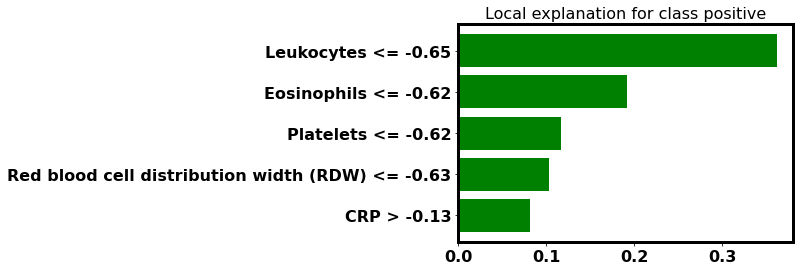

In [117]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**Random Forest**

In [118]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', rf.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.18
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [119]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train), 
                                              feature_names= X_train.columns, class_names = class_names, 
                                              discretize_continuous=True)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = rf.predict_proba, num_features = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


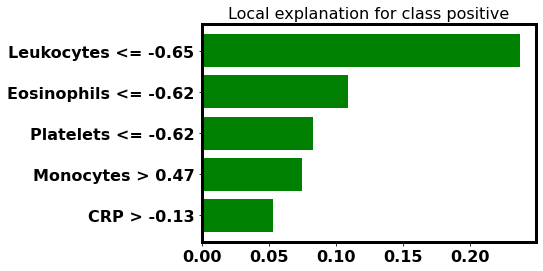

In [120]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**XGBC**

In [121]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', xgbc.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.018210113
True class: positive


In [122]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = xgbc.predict_proba, num_features = 5)

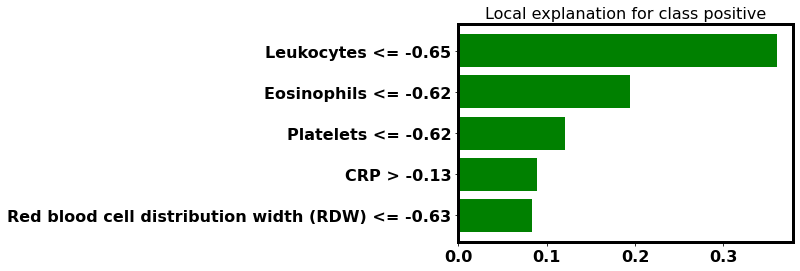

In [123]:
%matplotlib inline
fig = exp.as_pyplot_figure()

**Logistic Regression**

In [ ]:
idx = 0
class_names = ['negative', 'positive']

print('Patient id: %d' % idx)
print('Probability(normal) =', lr.predict_proba(np.array(X_test)[idx, :].reshape(1, -1))[0][0])
print('True class: %s' % class_names[y_test[idx]])

Patient id: 0
Probability(normal) = 0.06989898290177532
True class: positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(np.array(X_train),  mode='classification',
                                              feature_names= X_train.columns, class_names = class_names)
exp = explainer.explain_instance(np.array(X_test)[idx, :], predict_fn = lr.predict_proba, num_features = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


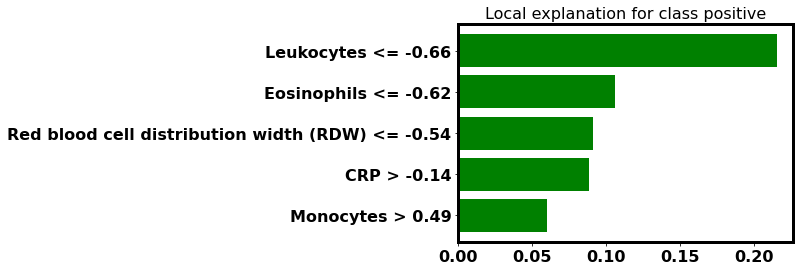

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()